In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, cohen_kappa_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# We are reading our data
df = pd.read_csv("C:/Users/NEIST/Desktop/Pre/main_datasets/MI_dataset_80.csv")

In [3]:
# First 5 rows of our data
df

,BCUTv-1l,BCUTi-1h,BCUTp-1l,BCUTZ-1l,BCUTd-1h,BCUTare-1l,BCUTs-1l,BCUTse-1l,BCUTpe-1l,PEOE_VSA9,...,GGI7,SpMax_A,SlogP_VSA6,Xch-7dv,BCUTs-1h,VR3_DzZ,ATSC0are,MDEO-12,MID_h,target
0,14.701776,14.557741,0.744080,5.748825,3.218349,2.238180,1.240005,2.479451,2.284833,12.710848,...,0.146719,2.406957,15.785918,0.114446,7.009374,4.780013,0.057803,0.721125,11.502322,1
1,14.700550,13.644287,0.741446,5.679853,3.258335,2.178923,1.143745,2.424758,2.228722,39.958147,...,0.831668,2.594727,24.265468,0.290166,7.008274,6.399864,0.107146,1.945385,15.431353,1
2,13.304117,17.424774,0.545839,5.666628,3.296716,2.162280,1.195097,2.406729,2.211106,30.297854,...,0.906250,2.524974,35.256849,0.202904,8.001924,6.886461,0.130099,0.664103,18.669048,1
3,13.304118,17.424774,0.545842,5.666628,3.296579,2.162280,1.195097,2.406729,2.211106,30.297854,...,0.875000,2.524519,35.256849,0.205673,8.001922,6.822288,0.120063,0.555524,16.894793,1
4,13.304116,17.424774,0.545837,5.666628,3.296716,2.162280,1.195097,2.406729,2.211106,36.842611,...,0.906250,2.524974,35.256849,0.176792,8.001924,6.885660,0.139150,1.230238,20.658497,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,13.304122,17.424767,0.546071,5.883844,4.032418,1.994006,0.291268,2.424025,2.114058,0.000000,...,0.000000,2.255245,0.000000,0.000000,8.001821,3.197438,0.061943,0.000000,12.135826,0
2354,14.705903,14.565372,0.775868,5.762599,3.267801,2.247387,1.220651,2.485813,2.292618,13.437118,...,0.272605,2.459075,6.327320,0.082526,6.003751,5.211740,0.060943,0.222222,15.490113,0
2355,15.584269,14.558553,0.996165,5.671568,3.309310,2.167403,1.257100,2.411225,2.216060,17.360722,...,0.121528,2.518855,30.592788,0.132771,4.005281,5.134329,0.017381,0.000000,8.142022,1
2356,14.702534,14.565388,0.748758,5.756853,3.269475,2.240717,1.419059,2.478957,2.285506,12.934202,...,0.146719,2.448877,23.273897,0.085253,7.008281,4.788652,0.041345,0.000000,13.577483,0


In [4]:
df.target.value_counts()

1    1702
0     656
Name: target, dtype: int64

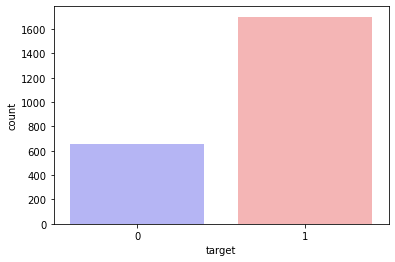

In [5]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [6]:
countNoDisease = len(df[df.target == False])
countHaveDisease = len(df[df.target == True])
print("Percentage of values with False: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of values with True: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of values with False: 27.82%
Percentage of values with True: 72.18%


In [7]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [8]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x

,BCUTv-1l,BCUTi-1h,BCUTp-1l,BCUTZ-1l,BCUTd-1h,BCUTare-1l,BCUTs-1l,BCUTse-1l,BCUTpe-1l,PEOE_VSA9,...,EState_VSA10,GGI7,SpMax_A,SlogP_VSA6,Xch-7dv,BCUTs-1h,VR3_DzZ,ATSC0are,MDEO-12,MID_h
0,0.942657,0.835020,0.690099,0.962758,0.774024,0.963008,0.813749,0.966570,0.963615,0.028702,...,0.079380,0.030832,0.845053,0.113207,0.029644,0.874995,0.430030,0.057803,0.049955,0.068101
1,0.942579,0.782625,0.687656,0.951207,0.783641,0.937512,0.750579,0.945249,0.939950,0.090228,...,0.081963,0.174769,0.910977,0.174018,0.075159,0.874857,0.575758,0.107146,0.134764,0.091363
2,0.853041,0.999470,0.506240,0.948992,0.792872,0.930351,0.784279,0.938220,0.932520,0.068414,...,0.203616,0.190441,0.886487,0.252841,0.052556,0.998897,0.619534,0.130099,0.046005,0.110532
3,0.853041,0.999470,0.506242,0.948992,0.792839,0.930351,0.784279,0.938221,0.932520,0.068414,...,0.163926,0.183874,0.886328,0.252841,0.053273,0.998897,0.613761,0.120063,0.038483,0.100027
4,0.853041,0.999470,0.506238,0.948992,0.792872,0.930351,0.784279,0.938220,0.932520,0.083193,...,0.203616,0.190441,0.886487,0.252841,0.045793,0.998897,0.619462,0.139150,0.085223,0.122311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,0.853042,0.999470,0.506454,0.985370,0.969811,0.857949,0.191144,0.944963,0.891591,0.000000,...,0.113825,0.000000,0.791789,0.000000,0.000000,0.998884,0.287655,0.061943,0.000000,0.071851
2354,0.942922,0.835457,0.719581,0.965065,0.785918,0.966969,0.801048,0.969050,0.966898,0.030342,...,0.000000,0.057286,0.863351,0.045376,0.021376,0.749461,0.468869,0.060943,0.015394,0.091711
2355,0.999241,0.835066,0.923895,0.949820,0.795901,0.932555,0.824968,0.939973,0.934610,0.039201,...,0.000000,0.025538,0.884339,0.219393,0.034390,0.499987,0.461905,0.017381,0.000000,0.048206
2356,0.942706,0.835458,0.694437,0.964102,0.786320,0.964100,0.931253,0.966377,0.963898,0.029206,...,0.039690,0.030832,0.859770,0.166907,0.022082,0.874858,0.430807,0.041345,0.000000,0.080387


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0, stratify = y)

In [10]:
#x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.10,random_state=0)
#x_train

In [11]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T
#x_val = x_val.T
#y_val = y_val.T

In [12]:
from sklearn.svm import SVC

In [13]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
predictions = svm.predict(x_test.T)
predictions_tr = svm.predict(x_train.T)
acc = svm.score(x_test.T,y_test.T)*100
acc_tr =svm.score(x_train.T,y_train.T)*100
print(acc)
print(acc_tr)
#predictions_val = svm.predict(x_val.T)
#acc_val =svm.score(x_val.T,y_val.T)*100
#print(acc_val)

77.54237288135593
79.79851537645811


In [14]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=svm, X=x_train.T, y=y_train.T, cv=10)
print(accuracies)
print(accuracies.mean())

[0.7989418  0.7989418  0.78835979 0.7989418  0.80952381 0.80952381
 0.76595745 0.79255319 0.80319149 0.79255319]
0.7958488123381742


In [15]:
cf =(confusion_matrix(y_test, predictions))
#cf_val =(confusion_matrix(y_val, predictions_val))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_train, predictions_tr))
print(classification_report(y_train, predictions_tr))
#print(confusion_matrix(y_val, predictions_val))
#print(classification_report(y_val, predictions_val))

[[ 51  80]
 [ 26 315]]
              precision    recall  f1-score   support

           0       0.66      0.39      0.49       131
           1       0.80      0.92      0.86       341

    accuracy                           0.78       472
   macro avg       0.73      0.66      0.67       472
weighted avg       0.76      0.78      0.75       472

[[ 212  313]
 [  68 1293]]
              precision    recall  f1-score   support

           0       0.76      0.40      0.53       525
           1       0.81      0.95      0.87      1361

    accuracy                           0.80      1886
   macro avg       0.78      0.68      0.70      1886
weighted avg       0.79      0.80      0.78      1886



In [16]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, predictions)

0.37940733519987635

In [17]:
#from sklearn.metrics import matthews_corrcoef
#matthews_corrcoef(y_val, predictions_val)

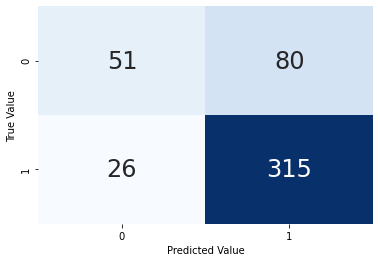

In [18]:
cf_plt =sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
cf_plt.set(xlabel = "Predicted Value", ylabel ="True Value")
cf_plt

In [19]:
#cf_plt =sns.heatmap(cf_val,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
#cf_plt.set(xlabel = "True Value", ylabel ="Actual Value")
#cf_plt

In [20]:
#parameters
r_auc_score = roc_auc_score(y_test, predictions)
print('AUC = %0.3f)' % r_auc_score)
rsquare = r2_score(y_test, predictions)
print('R2 = %0.3f)' % rsquare)
#mae = mean_absolute_error(y_test, predictions)
#print('MAE = %0.3f)' % mae)
mse = mean_squared_error(y_test, predictions)
print('MSE = %0.3f)' % mse)
mbe = np.mean(predictions - y_test)
print('MBE = %0.3f)'% mbe)
rmse = mse** (1/2)
print('RMSE = %0.3f)' % rmse)
variance = np.var(predictions)
print('Variance = %0.3f)'% variance)
sse = np.mean((np.mean(predictions) - y)** 2)
bias = sse - variance
print('Bias = %0.3f)'% bias)
kappa = cohen_kappa_score(y_test, predictions)
print('Kappa = %0.3f)'% kappa)

AUC = 0.657)
R2 = -0.120)
MSE = 0.225)
MBE = 0.114)
RMSE = 0.474)
Variance = 0.137)
Bias = 0.078)
Kappa = 0.359)


In [21]:
#fall out
FP = cf.sum(axis=0) - np.diag(cf) 
FN = cf.sum(axis=1) - np.diag(cf)
TP = np.diag(cf)
TN = cf.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
#TPR = TP/(TP+FN)
# Specificity or true negative rate
#TNR = TN/(TN+FP) 
# Precision or positive predictive value
#PPV = TP/(TP+FP)
# Negative predictive value
#NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
#ACC = (TP+TN)/(TP+FP+FN+TN)
print(FPR)
print(FNR)
print(FDR)

[0.07624633 0.61068702]
[0.61068702 0.07624633]
[0.33766234 0.20253165]


In [22]:
print("complete")

complete
